<a href="https://colab.research.google.com/github/nasibehmohammadi/Thesis/blob/main/1GRU_d4(UCIp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1️⃣ بارگذاری دیتاست شخصی (لطفاً نام فایل را تغییر بده!)
file_path = "/content/d4.csv"  # نام فایل خود را اینجا بگذار
df = pd.read_csv(file_path)

# 2️⃣ بررسی ساختار داده‌ها
print("🔍 بررسی ۵ سطر اول دیتاست:")
print(df.head())

# 3️⃣ مشخص کردن ویژگی‌های ورودی و خروجی
# نام ستون‌ها را بر اساس دیتاست خود تغییر بده!
feature_columns = ["B","C"]  # نام ویژگی‌ها
target_column = "A"  # نام ستون هدف (برچسب‌ها)

# تبدیل دیتافریم به آرایه NumPy
X_data = df[feature_columns].values
y_data = df[target_column].values

# مشخص کردن تعداد ویژگی‌ها
num_features = X_data.shape[1]

# 4️⃣ تنظیم داده‌ها برای مدل GRU
time_steps = 10  # تعداد مراحل زمانی (مثلاً ۱۰ ورود اخیر هر کاربر)

# ایجاد دنباله‌های زمانی برای GRU
X_sequences = []
y_sequences = []

for i in range(len(X_data) - time_steps):
    X_sequences.append(X_data[i : i + time_steps])  # داده‌های ۱۰ زمان اخیر
    y_sequences.append(y_data[i + time_steps])  # مقدار هدف بعد از ۱۰ مرحله

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# 5️⃣ تقسیم داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# 6️⃣ مقیاس‌بندی داده‌ها
scaler = MinMaxScaler()
X_train = X_train.reshape(-1, num_features)
X_test = X_test.reshape(-1, num_features)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(-1, time_steps, num_features)
X_test = X_test.reshape(-1, time_steps, num_features)

# 7️⃣ ایجاد مدل GRU
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(time_steps, num_features)),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 8️⃣ کامپایل مدل
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9️⃣ آموزش مدل روی دیتای شخصی
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 🔟 ارزیابی مدل
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ دقت مدل روی داده‌های تست: {accuracy * 100:.2f}%")

# ۱۱️⃣ پیش‌بینی روی یک نمونه جدید
test_sample = X_test[0].reshape(1, time_steps, num_features)
prediction = model.predict(test_sample)

if prediction > 0.5:
    print("🚨 ورود مشکوک! نیاز به احراز هویت بیشتر.")
else:
    print("✅ ورود ایمن است.")

🔍 بررسی ۵ سطر اول دیتاست:
   A      B      C
0  0  11044  45813
1  1  11044  65766
2  1   9521  72531
3  1   9521  72531
4  1   9521  72531
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1790/1790 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9664 - loss: 0.1518 - val_accuracy: 0.9723 - val_loss: 0.1275
Epoch 2/10
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9741 - loss: 0.1220 - val_accuracy: 0.9723 - val_loss: 0.1267
Epoch 3/10
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9743 - loss: 0.1209 - val_accuracy: 0.9723 - val_loss: 0.1267
Epoch 4/10
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9728 - loss: 0.1267 - val_accuracy: 0.9723 - val_loss: 0.1279
Epoch 5/10
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9741 - loss: 0.1225 - val_accuracy: 0.9723 - val_loss: 0.1261
Epoch 6/10
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.9735 - loss: 0.1233 - val_accuracy: 0.9723 - val_loss: 0.1259
Epoch 7/10
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.9743 - loss: 0.1192 - val_accuracy: 0.9723 - val_loss: 0.1244
Epoch 8/10
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9741 - loss: 0.11

In [8]:
from sklearn.metrics import f1_score

In [9]:
from sklearn.metrics import f1_score

# 1️⃣ پیش‌بینی بر روی مجموعه تست
y_pred = model.predict(X_test)

# 2️⃣ تبدیل احتمالات به برچسب‌های 0 و 1 (اگر مقدار احتمال > 0.5 باشد، کلاس 1 است، در غیر این صورت 0)
y_pred_classes = (y_pred > 0.5).astype(int)

# 3️⃣ محاسبه F1-Score
f1 = f1_score(y_test, y_pred_classes)

print(f"🎯 F1-Score مدل: {f1:.4f}")


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
🎯 F1-Score مدل: 0.9859


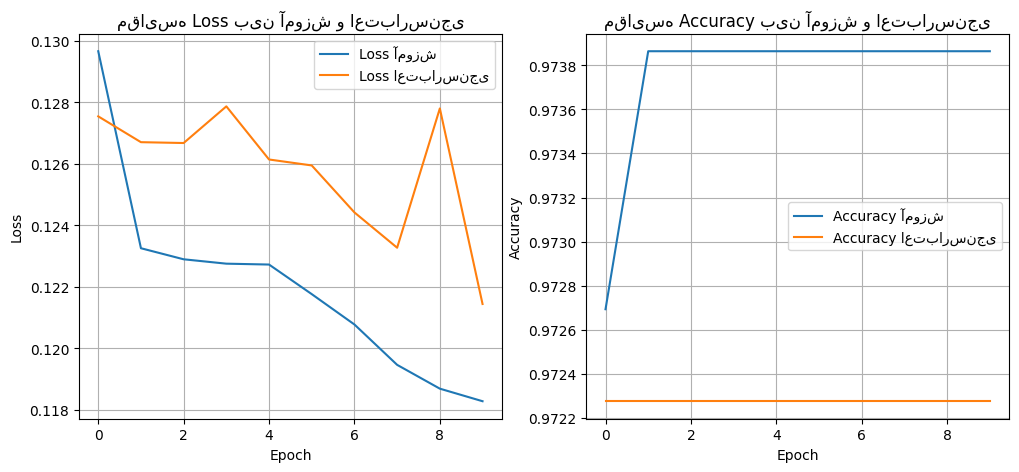

In [10]:
import matplotlib.pyplot as plt

# 📊 رسم نمودار Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss آموزش')
plt.plot(history.history['val_loss'], label='Loss اعتبارسنجی')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('مقایسه Loss بین آموزش و اعتبارسنجی')
plt.legend()
plt.grid()

# 📊 رسم نمودار Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy آموزش')
plt.plot(history.history['val_accuracy'], label='Accuracy اعتبارسنجی')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('مقایسه Accuracy بین آموزش و اعتبارسنجی')
plt.legend()
plt.grid()

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


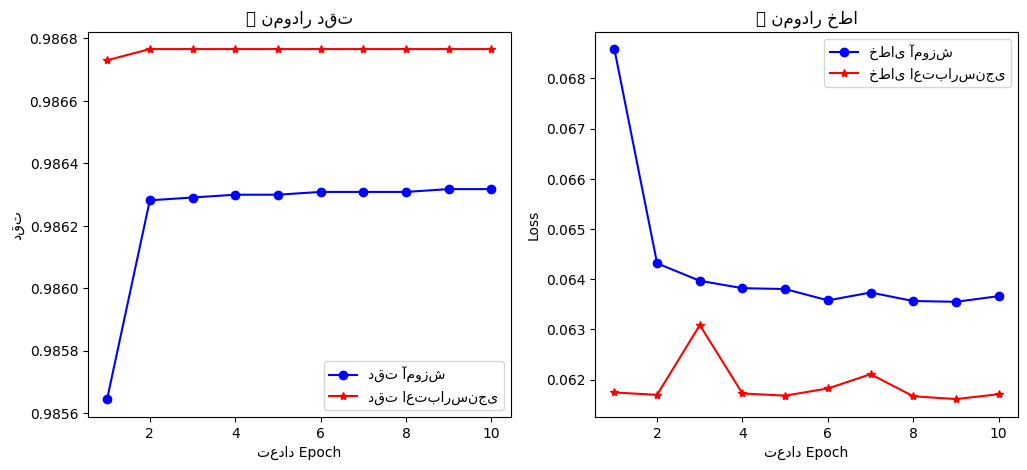

✅ بیش‌برازش رخ نداده است. مدل به خوبی روی داده‌های اعتبارسنجی تعمیم یافته است.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def check_overfitting(history, threshold=0.05):
    """
    بررسی بیش‌برازش (Overfitting) با مقایسه دقت و خطای داده‌های آموزشی و اعتبارسنجی.

    - history: شیء History که از model.fit() به دست می‌آید.
    - threshold: آستانه‌ای که اگر اختلاف loss از آن بیشتر شود، مدل را بیش‌برازش در نظر می‌گیریم.
    """

    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # محاسبه اختلاف دقت و خطا بین داده‌های آموزشی و اعتبارسنجی
    acc_gap = np.abs(np.array(train_acc) - np.array(val_acc))
    loss_gap = np.abs(np.array(train_loss) - np.array(val_loss))

    # بررسی آیا بیش‌برازش رخ داده است؟
    overfitting_detected = np.any(loss_gap > threshold)

    # 📈 رسم نمودار دقت و خطا
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(12, 5))

    # 📊 نمودار دقت
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'bo-', label='دقت آموزش')
    plt.plot(epochs, val_acc, 'r*-', label='دقت اعتبارسنجی')
    plt.xlabel('تعداد Epoch')
    plt.ylabel('دقت')
    plt.title('📊 نمودار دقت')
    plt.legend()

    # 📊 نمودار خطا (Loss)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo-', label='خطای آموزش')
    plt.plot(epochs, val_loss, 'r*-', label='خطای اعتبارسنجی')
    plt.xlabel('تعداد Epoch')
    plt.ylabel('Loss')
    plt.title('📊 نمودار خطا')
    plt.legend()

    plt.show()

    # 🛑 نمایش نتیجه
    if overfitting_detected:
        print("⚠️ بیش‌برازش (Overfitting) رخ داده است! مدل روی داده‌های آموزشی خیلی خوب عمل کرده اما روی داده‌های اعتبارسنجی عملکرد ضعیف‌تری دارد.")
    else:
        print("✅ بیش‌برازش رخ نداده است. مدل به خوبی روی داده‌های اعتبارسنجی تعمیم یافته است.")

# 📌 استفاده از تابع برای بررسی مدل
check_overfitting(history)
